# Underfitting vs. Overfitting

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import  metrics

Rozważmy następujący zbiór punktów:

In [42]:
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

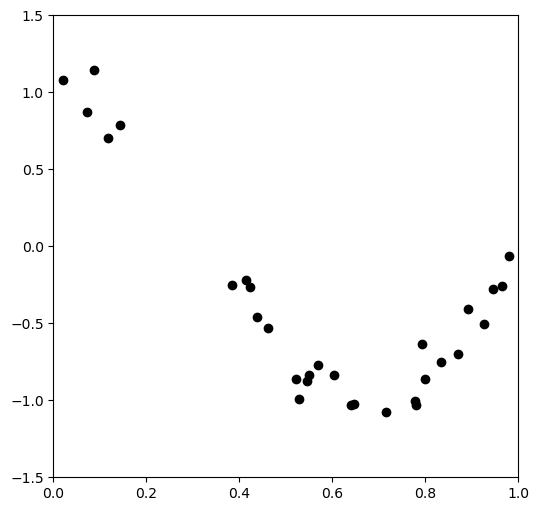

In [43]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X, y,  color='black')
x_tr = np.linspace(0, 1, 200)
plt.show()

Podziel dane na dwie grupy.

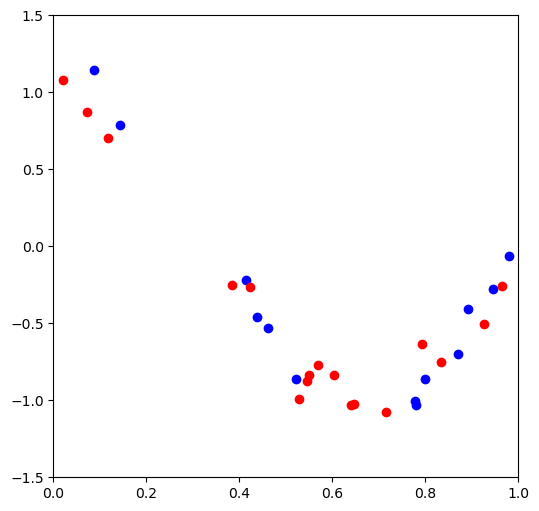

In [44]:
s=np.random.random_sample(n_samples)
s[s>0.5]=1
s[s<=0.5]=0
X1=X[s==1]
y1=y[s==1]
X2=X[s==0]
y2=y[s==0]

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie 1
Wykonaj regresję:

* liniową
* wielomianową stopnia 20

w każdej z grup.

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import  metrics
from sklearn import linear_model

In [46]:
X1=np.vstack(X1)
X2=np.vstack(X2)
model1 = make_pipeline(PolynomialFeatures(1), linear_model.LinearRegression())
model1.fit(X1, y1)
model2 = make_pipeline(PolynomialFeatures(1), linear_model.LinearRegression())
model2.fit(X2, y2)

model3 = make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression())
model3.fit(X1, y1)
model4 = make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression())
model4.fit(X2, y2)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=20)),
                ('linearregression', LinearRegression())])

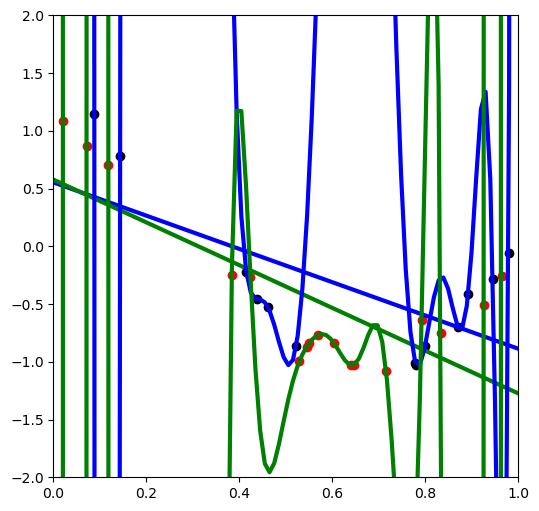

R^2: 0.4405716416224199
R^2: 0.5591028685078241
R^2: -897404.1022117056
R^2: 0.9999798665664538


In [47]:
# Plot outputs
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-2,2])
plt.scatter(X1, y1,  color='black')
plt.scatter(X2, y2,  color='red')
x_plot = np.vstack(np.linspace(0, 1, 100))
plt.plot(x_plot, model1.predict(x_plot), color='blue',linewidth=3)
plt.plot(x_plot, model2.predict(x_plot), color='green',linewidth=3)
plt.plot(x_plot, model3.predict(x_plot), color='blue',linewidth=3)
plt.plot(x_plot, model4.predict(x_plot), color='green',linewidth=3)
plt.show()
print("R^2: {}".format(metrics.r2_score(y2, model1.predict(X2))))
print("R^2: {}".format(metrics.r2_score(y2, model2.predict(X2))))
print("R^2: {}".format(metrics.r2_score(y2, model3.predict(X2))))
print("R^2: {}".format(metrics.r2_score(y2, model4.predict(X2))))


# Zadanie 2
Wykonaj 100 podziałów na dwie równe części. Za każdym razem naucz regresję:

* liniową
* wielomianową stopnia 1, 2, 3, 4, 5, 6

na jednym fragmęcie i policz R_square na drugim.
Zwizualizuj wynik.


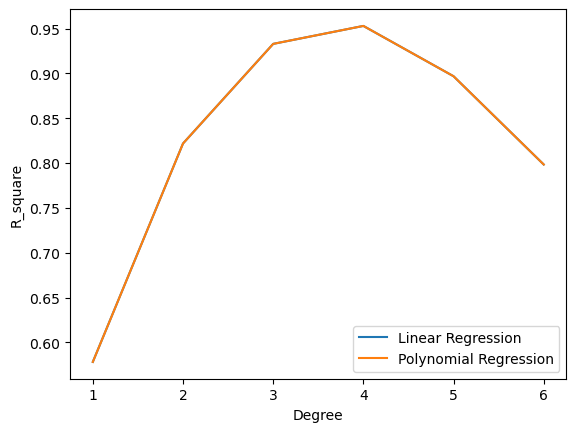

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

s=np.random.random_sample(n_samples)
s[s>0.5]=1
s[s<=0.5]=0
X1=X[s==1]
y1=y[s==1]
X2=X[s==0]
y2=y[s==0]
X1=np.vstack(X1)
X2=np.vstack(X2)

r2_linear = []
r2_polynomial = []

for degree in range(1, 7):
    
    model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
    model.fit(X1, y1)
    
    r2_linear.append(r2_score(y2, model.predict(X2)))
    r2_polynomial.append(r2_score(y2, model.predict(X2)))

degrees = range(1, 7)
plt.plot(degrees, r2_linear, label='Linear Regression')
plt.plot(degrees, r2_polynomial, label='Polynomial Regression')
plt.xlabel('Degree')
plt.ylabel('R_square')
plt.legend()
plt.show()
